Cross-Validation F1 Scores: [0.48769534 0.49487983 0.49506891 0.50071499 0.48916487]
Mean Cross-Validation F1 Score: 49.35%
Test Accuracy: 55.17%

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.73      0.71       123
           2       0.62      0.65      0.64       134
           3       0.50      0.60      0.55       111
           4       0.51      0.50      0.51       123
           5       0.50      0.49      0.50       112
           6       0.49      0.60      0.53       109
           7       0.56      0.58      0.57       116
           8       0.58      0.44      0.50       129
           9       0.61      0.60      0.61       127
          10       0.47      0.51      0.49       103
          11       0.55      0.55      0.55       121
          12       0.48      0.31      0.37        95

    accuracy                           0.55      1403
   macro avg       0.55      0.55      0.54      1403
weighted avg     

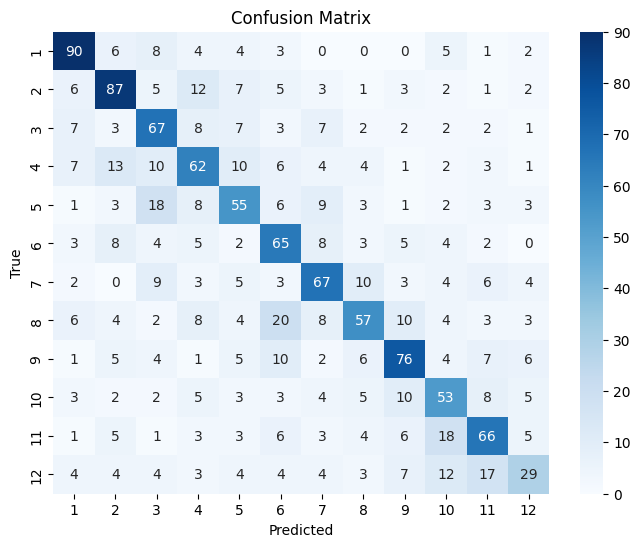

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


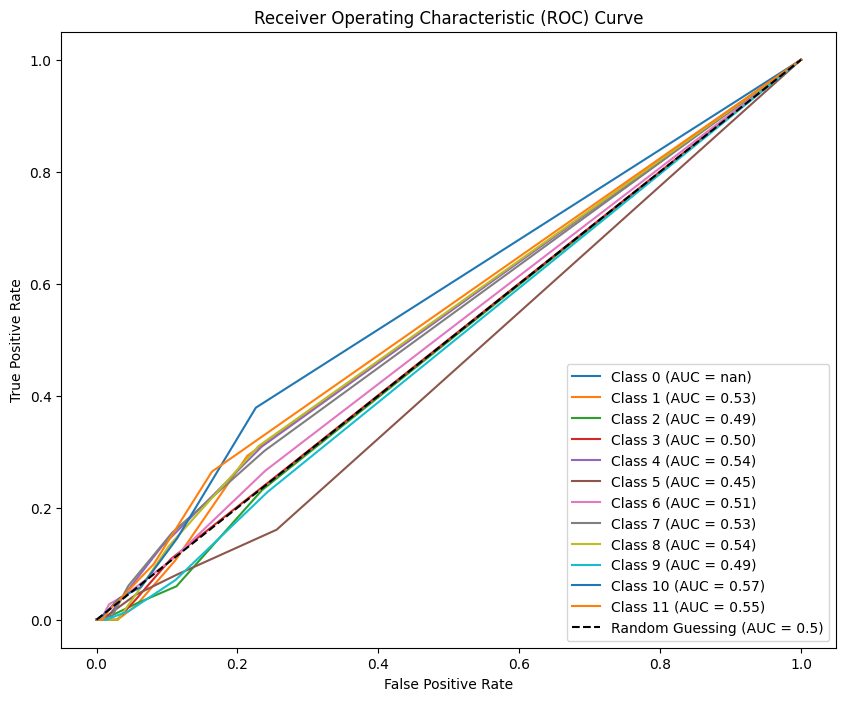


Summary of Results:
                           Metric      Value
0  Mean Cross-Validation F1 Score  49.350479
1                   Test Accuracy  55.167498


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with your file)
data = pd.read_csv('LDA.csv')

# Define features (X) and target labels (y)
X = data.drop('target', axis=1)  # Replace 'target_column' with your target column name
y = data['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=None)  # Use None for maximum components (classes - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_lda, y_train)

# Perform cross-validation with macro-average F1 score
cv_scores = cross_val_score(knn, X_train_lda, y_train, cv=5, scoring='f1_macro')  # 5-fold cross-validation with F1 score
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean Cross-Validation F1 Score: {cv_scores.mean() * 100:.2f}%")

# Predict on the test set
y_pred = knn.predict(X_test_lda)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"Test Accuracy: {accuracy:.2f}%")  # Display with two decimal places

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step for ROC Curve
# We need probability scores for each class to calculate the ROC curve
y_pred_prob = knn.predict_proba(X_test_lda)  # Get probability estimates for each class

# For multi-class classification, we plot a ROC curve for each class
n_classes = len(set(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Summary Table
results = {
    'Metric': ['Mean Cross-Validation F1 Score', 'Test Accuracy'],
    'Value': [cv_scores.mean() * 100, accuracy]
}

summary_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary_df)
